<a href="https://colab.research.google.com/github/gussgary/Telco-Customer-Churn-Prediction/blob/main/TelcoCustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Strategic Customer Retention Through Predictive Modeling: A Machine Learning Approach to Telecommunications Churn**

# Library setup and data loading


In [42]:
!git clone https://github.com/gussgary/Telco-Customer-Churn-Prediction.git

%cd telco-customer-churn-prediction
!git pull origin main

fatal: destination path 'Telco-Customer-Churn-Prediction' already exists and is not an empty directory.
[Errno 2] No such file or directory: 'telco-customer-churn-prediction'
/content
fatal: not a git repository (or any of the parent directories): .git


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('default')
sns.set_palette("husl")

In [44]:
dataset_url = 'https://raw.githubusercontent.com/gussgary/Telco-Customer-Churn-Prediction/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(dataset_url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [45]:
print("\n2.1 Dataset Overview")
print("-" * 30)
print(f"Dataset dimensions: {df.shape}")
print(f"Number of customers: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1]}")


2.1 Dataset Overview
------------------------------
Dataset dimensions: (7043, 21)
Number of customers: 7,043
Number of features: 21


In [46]:
print("\n2.2 Data Types and Missing Values")
print("-" * 30)
print(df.info())

print("\n2.3 Statistical Summary")
print("-" * 30)
print(df.describe())


2.2 Data Types and Missing Values
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 

In [47]:
print("\n2.4 Missing Value Analysis")
print("-" * 30)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame(
    {
        "Missing Count":missing_values,
        "Missing Percentage":missing_percentage
    }
)
print(missing_df[missing_df['Missing Count'] > 0])


2.4 Missing Value Analysis
------------------------------
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


# Data Visualisation

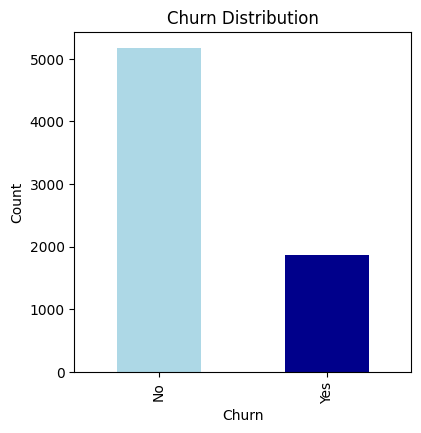

In [48]:
# 3.1 Target variable distribution
fig = plt.figure(figsize=(20, 15))

plt.subplot(3,4,1)
churn_counts = df['Churn'].value_counts()
churn_counts.plot (
    kind = 'bar',
    color = ['lightblue', 'darkblue']
)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()

<Figure size 2000x1500 with 0 Axes>

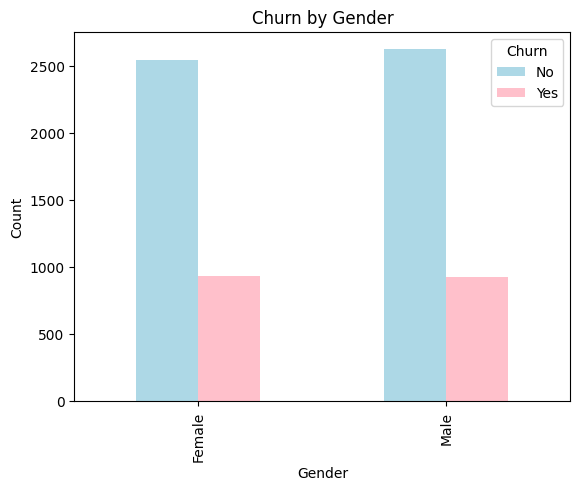

In [49]:
#3.2 Gender Distribution by churn
fig = plt.figure(figsize=(20, 15))

pd.crosstab(df['gender'], df['Churn']).plot(
    kind='bar',
    color=['lightblue', 'pink']
    )
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

<Figure size 2000x1500 with 0 Axes>

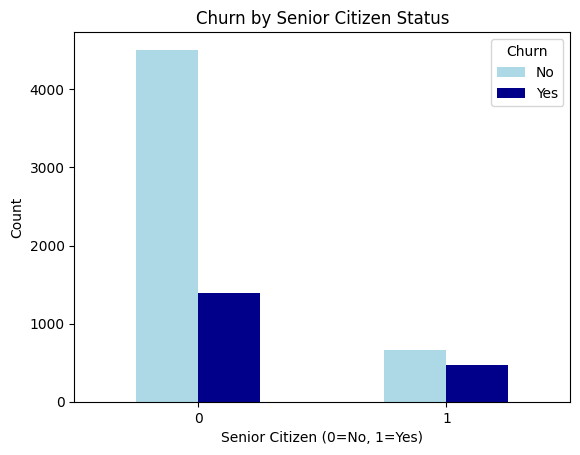

In [50]:
# 3.3 Senior Citizen distribution by churn
fig = plt.figure(figsize=(20, 15))

pd.crosstab(df['SeniorCitizen'], df['Churn']).plot(
    kind='bar',
    color=['lightblue', 'darkblue'])
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

<Figure size 2000x1500 with 0 Axes>

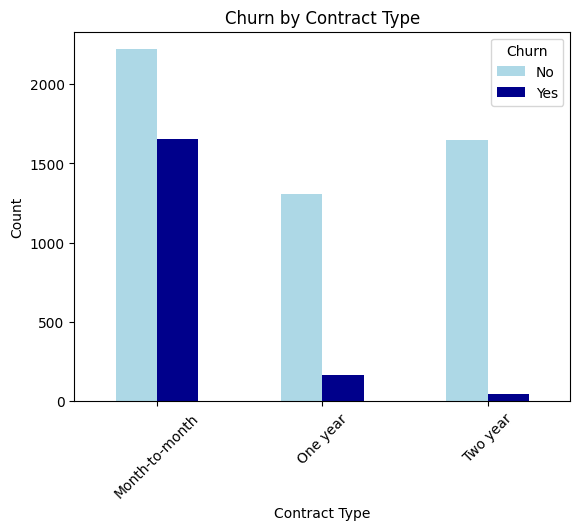

In [51]:
# 3.4 Contract type by churn
fig = plt.figure(figsize=(20, 15))

contract_churn = pd.crosstab(df['Contract'], df['Churn'])
contract_churn.plot(kind='bar',
                    color=['lightblue', 'darkblue']
                    )
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

<Figure size 2000x1500 with 0 Axes>

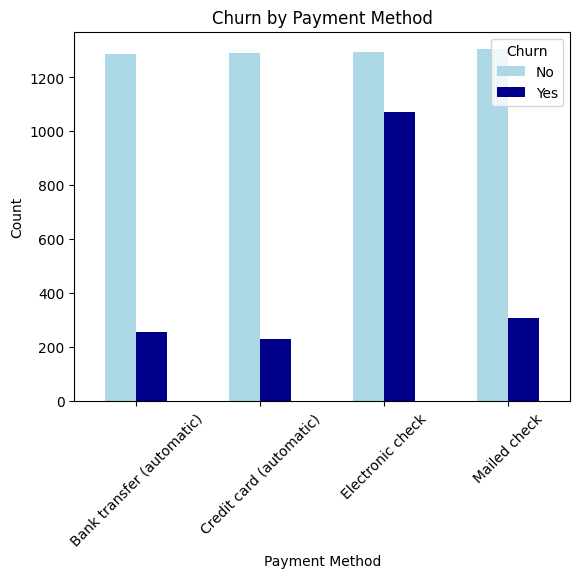

In [52]:
# 3.5 Payment method by churn
fig = plt.figure(figsize=(20, 15))

payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'])
payment_churn.plot(
    kind='bar',
    color=['lightblue', 'darkblue']
    )
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

<Figure size 2000x1500 with 0 Axes>

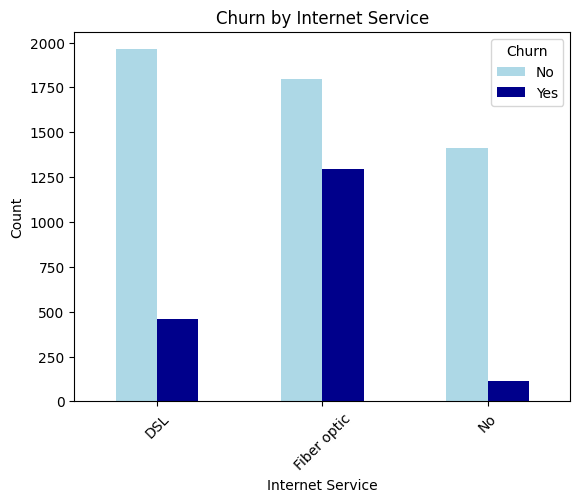

In [53]:
# 3.6 Internet Service by churn
fig = plt.figure(figsize=(20, 15))

internet_churn = pd.crosstab(df['InternetService'], df['Churn'])
internet_churn.plot(
    kind='bar',
    color=['lightblue', 'darkblue']
    )
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

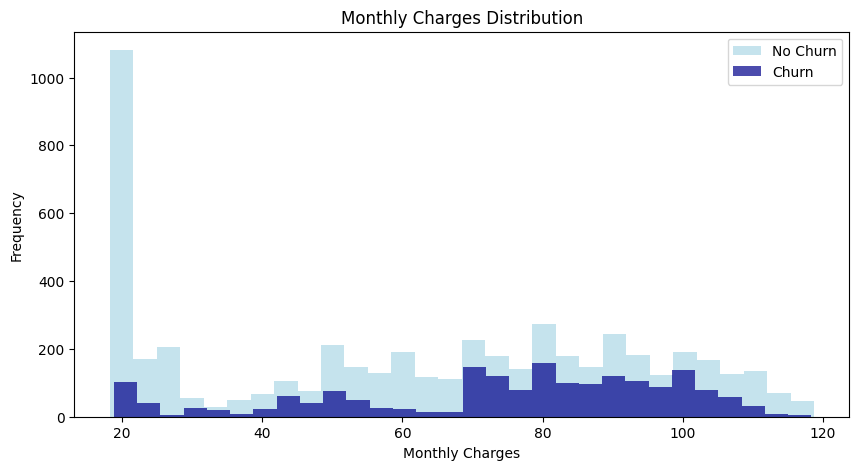

In [54]:
# 3.7 Monthly Charges distribution
fig = plt.figure(figsize=(10, 5))

plt.hist(
    df[df['Churn']=='No']['MonthlyCharges'],
    alpha=0.7,
    label='No Churn',
    bins=30,
    color='lightblue')
plt.hist(
    df[df['Churn']=='Yes']['MonthlyCharges'],
    alpha=0.7,
    label='Churn',
    bins=30,
    color='darkblue')
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend()

plt.show()

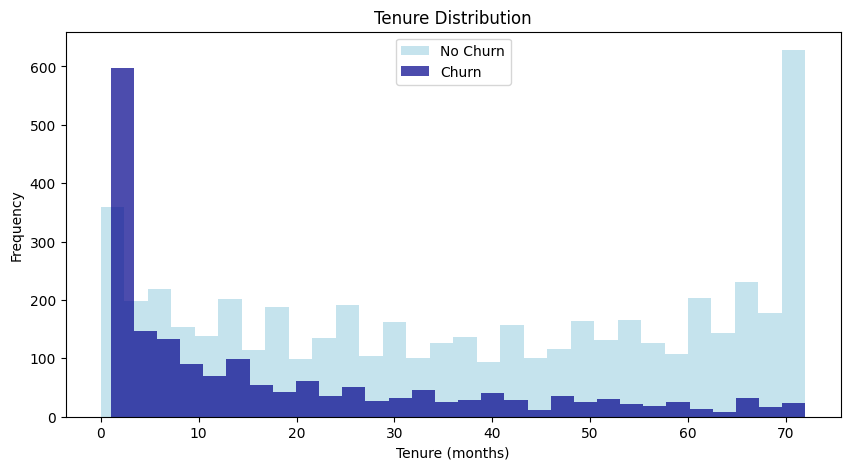

In [55]:
# 3.8 Tenure distribution
fig = plt.figure(figsize=(10, 5))

plt.hist(
    df[df['Churn']=='No']['tenure'],
    alpha=0.7,
    label='No Churn',
    bins=30,
    color='lightblue')
plt.hist(
    df[df['Churn']=='Yes']['tenure'],
    alpha=0.7,
    label='Churn',
    bins=30,
    color='darkblue')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.legend()

plt.show()

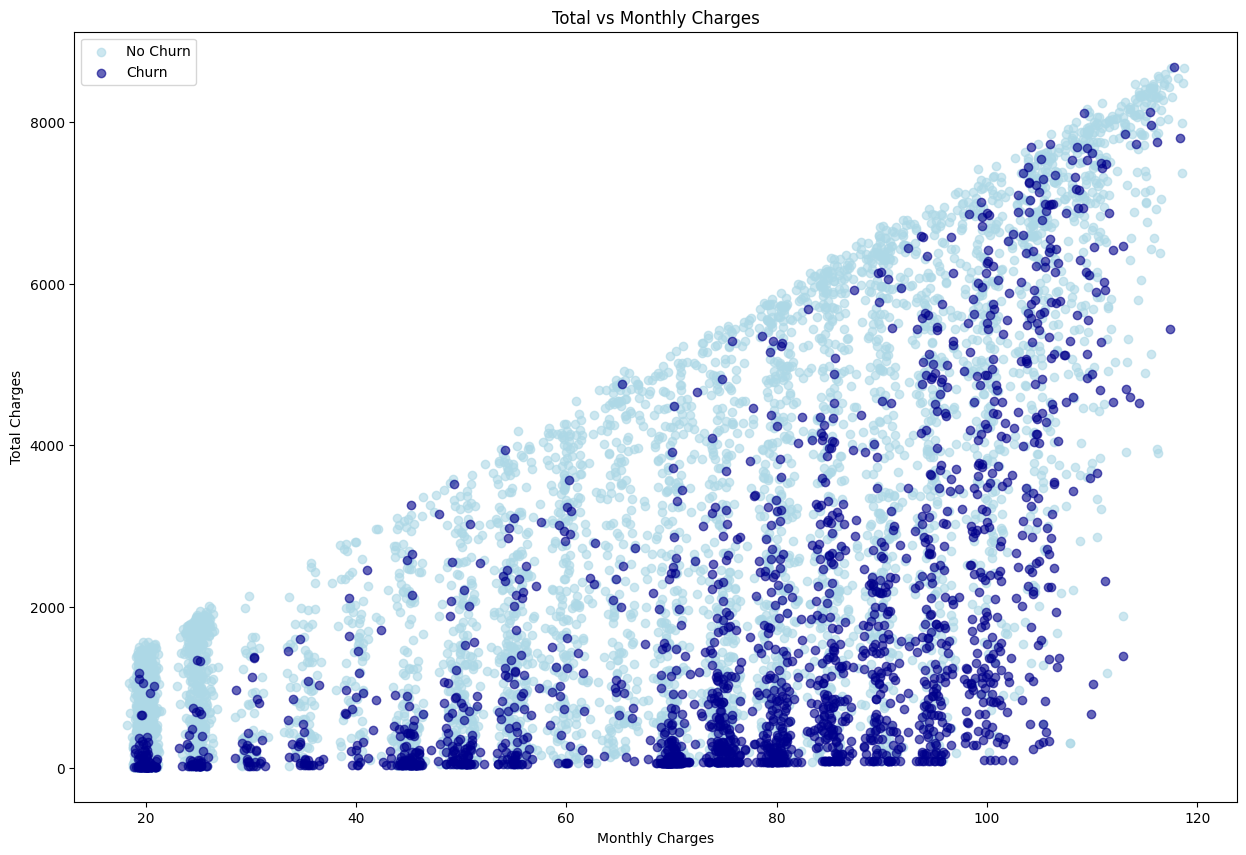

In [56]:
# 3.9 Total Charges vs Monthly Charges
fig = plt.figure(figsize=(15, 10))

# Convert TotalCharges to numeric, handling empty strings
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
churn_yes = df[df['Churn'] == 'Yes']
churn_no = df[df['Churn'] == 'No']
plt.scatter(
    churn_no['MonthlyCharges'],
    churn_no['TotalCharges'],
    alpha=0.6,
    label='No Churn',
    color='lightblue')
plt.scatter(
    churn_yes['MonthlyCharges'],
    churn_yes['TotalCharges'],
    alpha=0.6,
    label='Churn',
    color='darkblue')
plt.title('Total vs Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend()

plt.show()

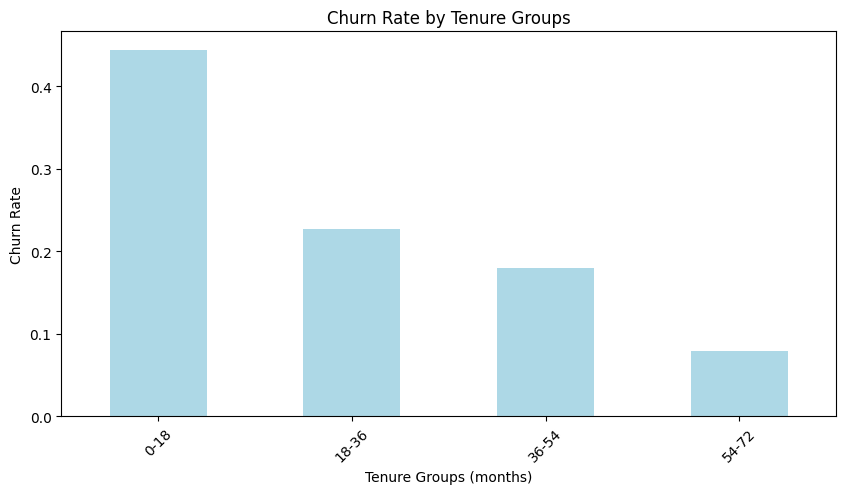

In [57]:
# 3.10 Churn rate by tenure groups
fig = plt.figure(figsize=(10, 5))

df['tenure_group'] = pd.cut(df['tenure'], bins=4, labels=['0-18', '18-36', '36-54', '54-72'])
tenure_churn_rate = df.groupby('tenure_group')['Churn'].apply(lambda x: (x=='Yes').mean())
tenure_churn_rate.plot(kind='bar', color='lightblue')
plt.title('Churn Rate by Tenure Groups')
plt.xlabel('Tenure Groups (months)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)

plt.show()

# Feature Engineering

In [58]:
# Create a copy of the dataset for preprocessing
df_processed = df.copy()

In [59]:
print(f"Missing values in Total Charge: {df_processed['TotalCharges'].isnull(). sum()}")
df_processed['TotalCharges'] = df_processed['TotalCharges'].fillna(df_processed['TotalCharges'].median())

Missing values in Total Charge: 11


In [60]:
#Convert TotalCharges in numeric
df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors = 'coerce')

#Fill null value with median
df_processed['TotalCharges'].fillna(df_processed['TotalCharges'].median(), inplace=True)

#Check the value if fill or still null
print(f"Missing values in Total Charges: {df_processed['TotalCharges'].isnull().sum()}")

Missing values in Total Charges: 0


In [61]:
# Create new features
# 1. Average charges per month
df_processed['AvgChargesPerMonth'] = df_processed['TotalCharges'] / (df_processed['tenure'] + 1)

# 2. Tenure groups
df_processed['tenure_group'] = pd.cut(
    df_processed['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1 year', '1-2 years', '2-4 years', '4+ years'])

# 3. Charges level
df_processed['charges_level'] = pd.cut(
    df_processed['MonthlyCharges'],
    bins=[0, 35, 65, 95, 120],
    labels=['Low', 'Medium', 'High', 'Very High'])

# 4. Service usage score (count of additional services)
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']
df_processed['service_count'] = 0
for col in service_cols:
    df_processed['service_count'] += (df_processed[col] == 'Yes').astype(int)

print("New features created:")
print(f"  - AvgChargesPerMonth: Average monthly spending")
print(f"  - tenure_group: Categorical tenure groups")
print(f"  - charges_level: Monthly charges categories")
print(f"  - service_count: Number of additional services")

New features created:
  - AvgChargesPerMonth: Average monthly spending
  - tenure_group: Categorical tenure groups
  - charges_level: Monthly charges categories
  - service_count: Number of additional services


In [62]:
# Drop customerID as it's not useful for prediction
df_processed.drop('customerID', axis=1, inplace=True)

# Encode binary categorical variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
le = LabelEncoder()

for col in binary_cols:
    df_processed[col] = le.fit_transform(df_processed[col])
    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Handle multi-category variables with one-hot encoding
multi_category_cols = ['InternetService', 'Contract', 'PaymentMethod', 'tenure_group', 'charges_level']

for col in multi_category_cols:
    if col in df_processed.columns:
        dummies = pd.get_dummies(df_processed[col], prefix=col)
        df_processed = pd.concat([df_processed, dummies], axis=1)
        df_processed.drop(col, axis=1, inplace=True)
        print(f"One-hot encoded {col}")

# Handle all categorical service variables properly
service_cols_extended = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in service_cols_extended:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})
        print(f"Mapped {col}: Yes=1, No=0, No internet service=0")

# Handle MultipleLines column (has 'No phone service' values)
if 'MultipleLines' in df_processed.columns:
    df_processed['MultipleLines'] = df_processed['MultipleLines'].map({
        'Yes': 1, 'No': 0, 'No phone service': 0
    })
    print("Mapped MultipleLines: Yes=1, No=0, No phone service=0")

# Encode target variable
df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})
print("Target variable 'Churn' encoded: Yes=1, No=0")

# Check for any remaining non-numeric columns
print("\n4.4 Final Data Type Check")
print("-" * 30)
non_numeric_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
if non_numeric_cols:
    print(f"Warning: Non-numeric columns still exist: {non_numeric_cols}")

    # Handle any remaining categorical columns
    for col in non_numeric_cols:
        if col != 'Churn':  # Skip if somehow Churn is still object
            print(f"Encoding remaining categorical column: {col}")
            unique_vals = df_processed[col].unique()
            print(f"  Unique values: {unique_vals}")

            # Create a mapping for remaining categorical variables
            le_temp = LabelEncoder()
            df_processed[col] = le_temp.fit_transform(df_processed[col].astype(str))
            print(f" Encoded {col}")
else:
    print("All columns are now numeric")

print(f"\nProcessed dataset shape: {df_processed.shape}")

Encoded gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Encoded Partner: {'No': np.int64(0), 'Yes': np.int64(1)}
Encoded Dependents: {'No': np.int64(0), 'Yes': np.int64(1)}
Encoded PhoneService: {'No': np.int64(0), 'Yes': np.int64(1)}
Encoded PaperlessBilling: {'No': np.int64(0), 'Yes': np.int64(1)}
One-hot encoded InternetService
One-hot encoded Contract
One-hot encoded PaymentMethod
One-hot encoded tenure_group
One-hot encoded charges_level
Mapped OnlineSecurity: Yes=1, No=0, No internet service=0
Mapped OnlineBackup: Yes=1, No=0, No internet service=0
Mapped DeviceProtection: Yes=1, No=0, No internet service=0
Mapped TechSupport: Yes=1, No=0, No internet service=0
Mapped StreamingTV: Yes=1, No=0, No internet service=0
Mapped StreamingMovies: Yes=1, No=0, No internet service=0
Mapped MultipleLines: Yes=1, No=0, No phone service=0
Target variable 'Churn' encoded: Yes=1, No=0

4.4 Final Data Type Check
------------------------------
All columns are now numeric

Processed dataset s

# Model Development

In [63]:
# Prepare features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (7043, 36)
Target shape: (7043,)


In [64]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training set churn rate: {y_train.mean():.3f}")
print(f"Test set churn rate: {y_test.mean():.3f}")

Training set size: 5634
Test set size: 1409
Training set churn rate: 0.265
Test set churn rate: 0.265


In [65]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth', 'service_count']

# Identify which numerical columns exist in the processed dataset
existing_numerical_cols = [col for col in numerical_cols if col in X_train.columns]
print(f"\nScaling numerical columns: {existing_numerical_cols}")

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[existing_numerical_cols] = scaler.fit_transform(X_train[existing_numerical_cols])
X_test_scaled[existing_numerical_cols] = scaler.transform(X_test[existing_numerical_cols])

print("Feature scaling completed")


Scaling numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth', 'service_count']
Feature scaling completed


# Machine Learning Model

In [66]:
#Initialize models
models = {
    'Logistic Regression' : LogisticRegression(random_state = 42, max_iter = 1000),
    'Random Forest Classifier' : RandomForestClassifier(random_state=42, n_estimators = 100),
    'Gradient Boosting' : GradientBoostingClassifier(random_state=42),
    'Support Vector Machine (SVM)' : SVC(random_state=42, probability=True)
}

#Storing result
results = {}
model_objects = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == 'SVM':
        # Use original features for SVM (it benefits from scaled features)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

        # Train the model
    if name == 'SVM':
        # Use original features for SVM (it benefits from scaled features)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

        # Cross-validation
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        # Use original features for tree-based models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'AUC Score': auc_score,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'Predictions': y_pred,
        'Probabilities': y_pred_proba
    }

    model_objects[name] = model

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  AUC Score: {auc_score:.4f}")
    print(f"  CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Training Logistic Regression...
  Accuracy: 0.8062
  AUC Score: 0.8480
  CV Score: 0.8081 (+/- 0.0196)

Training Random Forest Classifier...
  Accuracy: 0.7864
  AUC Score: 0.8269
  CV Score: 0.7898 (+/- 0.0159)

Training Gradient Boosting...
  Accuracy: 0.8020
  AUC Score: 0.8434
  CV Score: 0.8019 (+/- 0.0240)

Training Support Vector Machine (SVM)...
  Accuracy: 0.7346
  AUC Score: 0.7952
  CV Score: 0.7346 (+/- 0.0002)


# Model Evaluation and Performance

In [67]:
# Create results comparison
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['Accuracy'] for model in results.keys()],
    'AUC Score': [results[model]['AUC Score'] for model in results.keys()],
    'CV Mean': [results[model]['CV Mean'] for model in results.keys()],
    'CV Std': [results[model]['CV Std'] for model in results.keys()]
})

results_df = results_df.sort_values('AUC Score', ascending=False)
print("7.1 Model Performance Comparison:")
print("-" * 30)
print(results_df.round(4))

7.1 Model Performance Comparison:
------------------------------
                          Model  Accuracy  AUC Score  CV Mean  CV Std
0           Logistic Regression    0.8062     0.8480   0.8081  0.0098
2             Gradient Boosting    0.8020     0.8434   0.8019  0.0120
1      Random Forest Classifier    0.7864     0.8269   0.7898  0.0079
3  Support Vector Machine (SVM)    0.7346     0.7952   0.7346  0.0001


In [68]:
# Find best model
best_model_name = results_df.iloc[0]['Model']
best_model = model_objects[best_model_name]
print(f"\n✓ Best performing model: {best_model_name}")
print(f"  AUC Score: {results_df.iloc[0]['AUC Score']:.4f}")


✓ Best performing model: Logistic Regression
  AUC Score: 0.8480


In [69]:
# Detailed evaluation of best model
print(f"\n7.2 Detailed Evaluation - {best_model_name}")
print("-" * 30)

best_predictions = results[best_model_name]['Predictions']
print("Classification Report:")
print(classification_report(y_test, best_predictions, target_names=['No Churn', 'Churn']))

# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
print(f"\nConfusion Matrix:")
print(cm)


7.2 Detailed Evaluation - Logistic Regression
------------------------------
Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.87      1035
       Churn       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[936  99]
 [174 200]]


# Result Visualisation

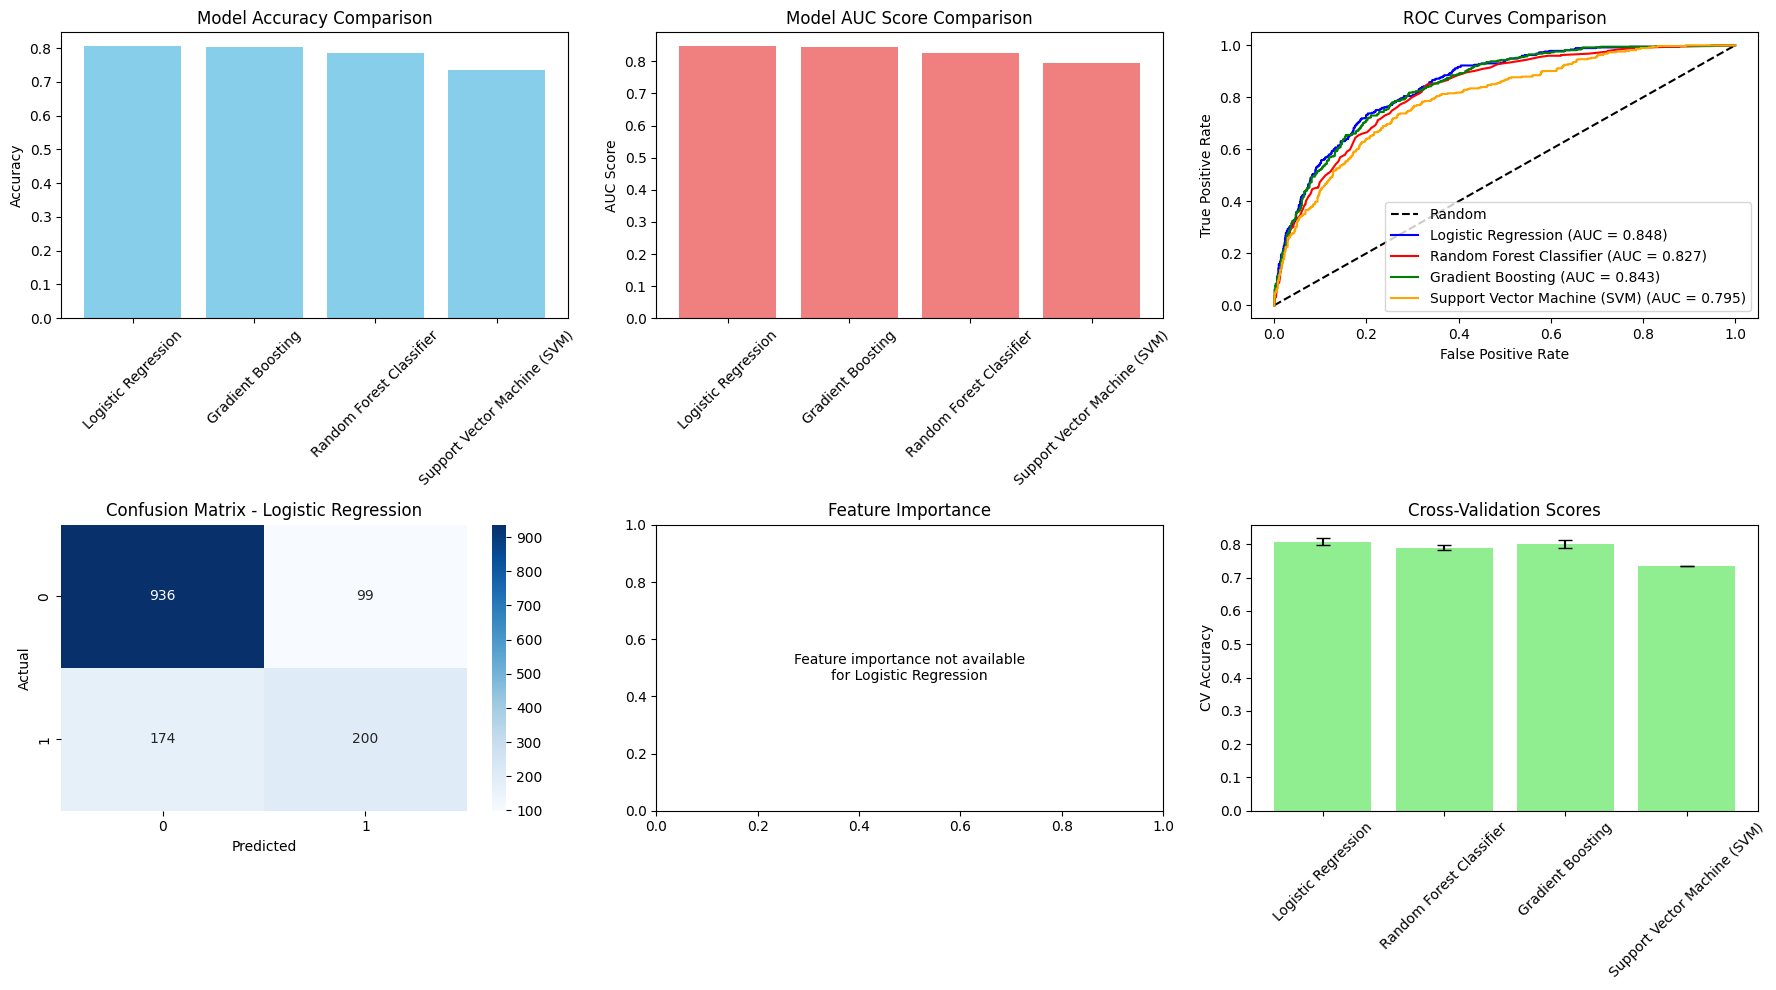

In [70]:
#Create visualization plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 8.1 Model Comparison - Accuracy
axes[0, 0].bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)

# 8.2 Model Comparison - AUC Score
axes[0, 1].bar(results_df['Model'], results_df['AUC Score'], color='lightcoral')
axes[0, 1].set_title('Model AUC Score Comparison')
axes[0, 1].set_ylabel('AUC Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# 8.3 ROC Curves
axes[0, 2].plot([0, 1], [0, 1], 'k--', label='Random')
colors = ['blue', 'red', 'green', 'orange']
for i, (name, result) in enumerate(results.items()):
    fpr, tpr, _ = roc_curve(y_test, result['Probabilities'])
    axes[0, 2].plot(fpr, tpr, color=colors[i], label=f'{name} (AUC = {result["AUC Score"]:.3f})')
axes[0, 2].set_xlabel('False Positive Rate')
axes[0, 2].set_ylabel('True Positive Rate')
axes[0, 2].set_title('ROC Curves Comparison')
axes[0, 2].legend()

# 8.4 Confusion Matrix for Best Model
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title(f'Confusion Matrix - {best_model_name}')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# 8.5 Feature Importance (for tree-based models)
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False).head(10)

    axes[1, 1].barh(range(len(feature_importance)), feature_importance['importance'])
    axes[1, 1].set_yticks(range(len(feature_importance)))
    axes[1, 1].set_yticklabels(feature_importance['feature'])
    axes[1, 1].set_title(f'Top 10 Feature Importance - {best_model_name}')
    axes[1, 1].set_xlabel('Importance')
else:
    axes[1, 1].text(0.5, 0.5, f'Feature importance not available\nfor {best_model_name}',
                   ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Feature Importance')

# 8.6 Cross-Validation Scores
cv_means = [results[model]['CV Mean'] for model in results.keys()]
cv_stds = [results[model]['CV Std'] for model in results.keys()]
axes[1, 2].bar(range(len(results)), cv_means, yerr=cv_stds, capsize=5, color='lightgreen')
axes[1, 2].set_xticks(range(len(results)))
axes[1, 2].set_xticklabels(results.keys(), rotation=45)
axes[1, 2].set_title('Cross-Validation Scores')
axes[1, 2].set_ylabel('CV Accuracy')

plt.tight_layout()
plt.show()

# Model Optimization (Hyperparameter Tuning)

In [71]:
print(f"9.1 Hyperparameter Tuning for {best_model_name}")
print("-" * 30)

# Define parameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1, 1],
        'kernel': ['rbf', 'linear']
    }
}

9.1 Hyperparameter Tuning for Logistic Regression
------------------------------


In [72]:
if best_model_name in param_grids:
    print(f"Performing GridSearchCV for {best_model_name}...")

    # Select appropriate training data
    if best_model_name == 'SVM':
        X_train_opt = X_train_scaled
        X_test_opt = X_test_scaled
    else:
        X_train_opt = X_train
        X_test_opt = X_test

         # Initialize base model
    if best_model_name == 'Random Forest':
        base_model = RandomForestClassifier(random_state=42)
    elif best_model_name == 'Gradient Boosting':
        base_model = GradientBoostingClassifier(random_state=42)
    elif best_model_name == 'Logistic Regression':
        base_model = LogisticRegression(random_state=42, max_iter=1000)
    elif best_model_name == 'SVM':
        base_model = SVC(random_state=42, probability=True)

        # Perform grid search
    grid_search = GridSearchCV(
        base_model,
        param_grids[best_model_name],
        cv=3,  # Reduced for faster execution
        scoring='roc_auc',
        n_jobs=-1
    )

    grid_search.fit(X_train_opt, y_train)

    # Get optimized model
    optimized_model = grid_search.best_estimator_

    # Evaluate optimized model
    y_pred_opt = optimized_model.predict(X_test_opt)
    y_pred_proba_opt = optimized_model.predict_proba(X_test_opt)[:, 1]

    accuracy_opt = accuracy_score(y_test, y_pred_opt)
    auc_opt = roc_auc_score(y_test, y_pred_proba_opt)

    print(f"✓ Hyperparameter tuning completed!")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    print(f"Optimized model test accuracy: {accuracy_opt:.4f}")
    print(f"Optimized model test AUC: {auc_opt:.4f}")

     # Compare with original model
original_accuracy = results[best_model_name]['Accuracy']
original_auc = results[best_model_name]['AUC Score']

print(f"\nImprovement:")
print(f"Accuracy: {original_accuracy:.4f} → {accuracy_opt:.4f} ({accuracy_opt - original_accuracy:+.4f})")
print(f"AUC Score: {original_auc:.4f} → {auc_opt:.4f} ({auc_opt - original_auc:+.4f})")

Performing GridSearchCV for Logistic Regression...
✓ Hyperparameter tuning completed!
Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.8485
Optimized model test accuracy: 0.8084
Optimized model test AUC: 0.8481

Improvement:
Accuracy: 0.8062 → 0.8084 (+0.0021)
AUC Score: 0.8480 → 0.8481 (+0.0001)


# End of analysis